
# Sentiment Classification of Movie Reviews Using Machine Learning and Neural Network Methods



Developed By: Kevin Reyes.


In [1]:
## Puede encontrar información sobre keras en https://keras.io/getting_started/intro_to_keras_for_engineers/
## Puede encontrar información sobre sklearn en https://scikit-learn.org/stable/

import os
import numpy as np
import matplotlib.pyplot as plt
import pickle

np.random.seed(1234)



First, let&#39;s load the dataset into memory and see some of its data


In [2]:
classes = ["negative", "positive"]
X_train, y_train, X_test, y_test = pickle.load(
    open("movies_review_train_test.dat", "rb")
)


In [3]:
print_n = 10
for k in range(print_n):
    print("Sentiment: {0}".format(classes[y_train[k]]))
    print("Text: ")
    print(X_train[k])
    print("\n")


Sentiment: positive
Text: 
This is one of those Film's/pilot that if you knew BattleStar Galactica it helps, but isn't necessary. What makes this even more believable of a story than BSG is that this isn't something so far away in the future. This has such a depth to it that it is quite astonishing it was not released theatrically. The leads could not have been chosen better in such experienced & quite talented actors. Eric Stoltz is superb as the father who will do anything to be re-united w/his daughter however real or not she is & he'll do it no matter the cost. Paula Malcomson of "Deadwood" fame is terrific as his wife as well. You are not sure completely of his motives whether it's love or money or both, but that is what makes this pilot even more intriguing. I see a star in the making of Zoe played by the relative unknown Alessandra Torresani & her performance. Esai Morales is terrific in his desire to see his loved one again & just how wrong to be even considering what he wants 


## classic models


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn import metrics



### Text vectorization using bag of words and tf-idf


In [5]:
# max_features = 1000
cv_vectorizer = CountVectorizer()
X_train_preprocesado_cv = cv_vectorizer.fit_transform(X_train)
X_test_preprocesado_cv = cv_vectorizer.transform(X_test)

tf_vectorizer = TfidfVectorizer()
X_train_preprocesado_tv = tf_vectorizer.fit_transform(X_train)
X_test_preprocesado_tv = tf_vectorizer.transform(X_test)



### MultinomialNB and LogisticRegression models


In [6]:
mnb_clf_cv = MultinomialNB()
mnb_clf_cv.fit(X_train_preprocesado_cv, y_train)
print(mnb_clf_cv.predict(X_test_preprocesado_cv[5:6]))

mnb_clf_tv = MultinomialNB()
mnb_clf_tv.fit(X_train_preprocesado_tv, y_train)
print(mnb_clf_tv.predict(X_test_preprocesado_tv[5:6]))

max_iter = 1000
lgr_clf_cv = LogisticRegression(max_iter=max_iter)
lgr_clf_cv.fit(X_train_preprocesado_cv, y_train)
print(lgr_clf_cv.predict(X_test_preprocesado_cv[5:6]))

lgr_clf_tv = LogisticRegression(max_iter=max_iter)
lgr_clf_tv.fit(X_train_preprocesado_tv, y_train)
print(lgr_clf_tv.predict(X_test_preprocesado_tv[5:6]))


[1]
[1]
[1]
[1]



### Hyperparameter optimization with GridSearchCV


In [7]:
max_iter = 700
lgr_clf_cv = LogisticRegression(max_iter=max_iter)

param_grid = [{"penalty": ["l2"], "C": [0.1, 0.5, 1.0, 1.3]}, {"penalty": ["none"]}]
clf_gscv_cv = GridSearchCV(lgr_clf_cv, param_grid=param_grid, cv=3).fit(
    X_train_preprocesado_cv, y_train
)


In [8]:
# Mejor configuración obtenida fue {'C': 0.1, 'penalty': 'l2'}
print(clf_gscv_cv.best_params_)


{'C': 0.1, 'penalty': 'l2'}



### Results with classification report


In [9]:
lgr_clf_cv_best_model = LogisticRegression(max_iter=max_iter, C=0.1, penalty="l2")
lgr_clf_cv_best_model.fit(X_train_preprocesado_cv, y_train)
print(
    classification_report(y_test, lgr_clf_cv_best_model.predict(X_test_preprocesado_cv))
)


              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1485
           1       0.88      0.88      0.88      1515

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000




### AUC and ROC curve


In [10]:
clf_gscv_cv_roc_auc = GridSearchCV(
    lgr_clf_cv, param_grid=param_grid, cv=3, scoring="roc_auc"
).fit(X_train_preprocesado_cv, y_train)
clf_gscv_cv_roc_auc.cv_results_


{'mean_fit_time': array([5.50665371, 8.07094487, 7.3223664 , 7.74424322, 1.59808524]),
 'std_fit_time': array([0.38629293, 0.29387472, 0.17525686, 0.24950256, 0.07811915]),
 'mean_score_time': array([0.00832319, 0.00801126, 0.00666682, 0.00599909, 0.00533175]),
 'std_score_time': array([2.04166815e-03, 1.64553123e-03, 9.44483384e-04, 1.08386530e-06,
        4.71201857e-04]),
 'param_C': masked_array(data=[0.1, 0.5, 1.0, 1.3, --],
              mask=[False, False, False, False,  True],
        fill_value='?',
             dtype=object),
 'param_penalty': masked_array(data=['l2', 'l2', 'l2', 'l2', 'none'],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.1, 'penalty': 'l2'},
  {'C': 0.5, 'penalty': 'l2'},
  {'C': 1.0, 'penalty': 'l2'},
  {'C': 1.3, 'penalty': 'l2'},
  {'penalty': 'none'}],
 'split0_test_score': array([0.93967906, 0.93520366, 0.93311708, 0.93241163, 0.9216656 ]),
 'split1_test_score': array([0.

In [11]:
lgr_clf_cv_1 = LogisticRegression(max_iter=max_iter, C=0.1, penalty="l2")
lgr_clf_cv_1.fit(X_train_preprocesado_cv, y_train)

lgr_clf_cv_2 = LogisticRegression(max_iter=max_iter, C=0.5, penalty="l2")
lgr_clf_cv_2.fit(X_train_preprocesado_cv, y_train)

lgr_clf_cv_3 = LogisticRegression(max_iter=max_iter, C=1, penalty="l2")
lgr_clf_cv_3.fit(X_train_preprocesado_cv, y_train)

lgr_clf_cv_4 = LogisticRegression(max_iter=max_iter, C=1.3, penalty="l2")
lgr_clf_cv_4.fit(X_train_preprocesado_cv, y_train)

lgr_clf_cv_5 = LogisticRegression(max_iter=max_iter, penalty="none")
lgr_clf_cv_5.fit(X_train_preprocesado_cv, y_train)


LogisticRegression(max_iter=700, penalty='none')

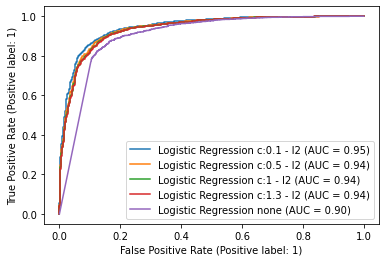

In [12]:
fig, ax = plt.subplots()
metrics.plot_roc_curve(
    lgr_clf_cv_1,
    X_test_preprocesado_cv,
    y_test,
    ax=ax,
    name="Logistic Regression c:0.1 - l2",
)
metrics.plot_roc_curve(
    lgr_clf_cv_2,
    X_test_preprocesado_cv,
    y_test,
    ax=ax,
    name="Logistic Regression c:0.5 - l2",
)
metrics.plot_roc_curve(
    lgr_clf_cv_3,
    X_test_preprocesado_cv,
    y_test,
    ax=ax,
    name="Logistic Regression c:1 - l2",
)
metrics.plot_roc_curve(
    lgr_clf_cv_4,
    X_test_preprocesado_cv,
    y_test,
    ax=ax,
    name="Logistic Regression c:1.3 - l2",
)
metrics.plot_roc_curve(
    lgr_clf_cv_5, X_test_preprocesado_cv, y_test, ax=ax, name="Logistic Regression none"
)
plt.show()



### Comments

 Regarding the results obtained in the classification report, it is highlighted that the dataset is almost completely balanced, since there are **1,485 negative reviews** and **1,515 positive ones** , which gives an imbalance of only **2%** . Since it is a binary classification problem and the classes are balanced, it is observed that the different indicators have the same value, from these it is interpreted that **88%** of the opinions classified as positive are effectively positive, the same happens for the negative. On the other hand, we can also say that **88%** of the positive opinions will be correctly detected, the same applies to the negative ones.

 The ROC curve compares the rate of true positives with the rate of false positives under different classification **thresholds** (for example, output &gt;= 0.5 then the opinion is positive, where 0.5 is the threshold). When observing the values of the Area under the ROC curve (AUC), it is observed that the best classifier is for a C of **0.1 and regularization l2** , this result is relevant to determine which model is better than another, since AUC is **invariant to the scale and the classification threshold** , therefore, there is a general indicator of performance of the classifiers.

 Since C is an **inverse** parameter of the strength of the regularizer, it is concluded that the model acquires **greater** **generalization** capacity by increasing the strength of the regularization l2, that is, a **lower** value of C.



### RandomForestClassifier


In [13]:
param_grid = [{"n_estimators": [10, 30], "criterion": ["gini", "entropy"]}]
clf_rf_cv = RandomForestClassifier(random_state=0)
clf_gscv_rf_cv = GridSearchCV(clf_rf_cv, param_grid=param_grid, cv=3).fit(
    X_train_preprocesado_cv, y_train
)
print(clf_gscv_rf_cv.cv_results_)
print("\n")
print("Mejores parámetros para dataset CounterVectorizer")
print(clf_gscv_rf_cv.best_params_)
print("\n")

clf_rf_tv = RandomForestClassifier(random_state=0)
clf_gscv_rf_tv = GridSearchCV(clf_rf_tv, param_grid=param_grid, cv=3).fit(
    X_train_preprocesado_tv, y_train
)
print(clf_gscv_rf_tv.cv_results_)
print("\n")
print("Mejores parámetros para dataset TfidfVectorizer")
print(clf_gscv_rf_tv.best_params_)


{'mean_fit_time': array([2.35975011, 7.10835934, 2.24796621, 6.5056332 ]), 'std_fit_time': array([0.14994382, 0.73147736, 0.06341558, 0.06371547]), 'mean_score_time': array([0.04586307, 0.12861649, 0.04433966, 0.11507662]), 'std_score_time': array([0.00288434, 0.00741029, 0.00339615, 0.00075695]), 'param_criterion': masked_array(data=['gini', 'gini', 'entropy', 'entropy'],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[10, 30, 10, 30],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'criterion': 'gini', 'n_estimators': 10}, {'criterion': 'gini', 'n_estimators': 30}, {'criterion': 'entropy', 'n_estimators': 10}, {'criterion': 'entropy', 'n_estimators': 30}], 'split0_test_score': array([0.7278, 0.7896, 0.7442, 0.7928]), 'split1_test_score': array([0.739 , 0.8004, 0.7402, 0.8044]), 'split2_test_score': array([0.7356, 0.801 , 0.7414, 0.80


The Random Forest model consists of creating a "forest" of decision trees, that is, several weak classifiers. Each tree is trained on a subsample of the dataset and the result of the Random Forest classification consists of the average or some other operation applied to all decision trees. On the other hand, a decision tree consists of a set of decision nodes and edges that represent possible values of the variables involved in the problem. The leaves of the tree will represent class labels, in the context of the opinions, we will have leaves with positive and negative classification.



## Neural network models


In [14]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense,
    Input,
    Embedding,
    LSTM,
    SimpleRNN,
    Add,
    Lambda,
    Dropout,
    Flatten,
    LayerNormalization,
)
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K


In [15]:
# Definición de parámetros
batch_size = 32
epochs = 2
num_classes = 2
max_words = 70
embedding_size = 30



### preprocessing

 Next we will preprocess the data, performing tokenization:


In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenizing text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train + X_test)
word_index = tokenizer.word_index
num_words = len(tokenizer.word_index) + 1


In [17]:
# Transformando texto a secuencias de indices
X_tr = tokenizer.texts_to_sequences(X_train)
X_te = tokenizer.texts_to_sequences(X_test)


In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Se agregan 0 a textos que tienen menos de max_words palabras y se cortan los que tienen mas
X_tr_pad = pad_sequences(X_tr, maxlen=max_words)
X_te_pad = pad_sequences(X_te, maxlen=max_words)
# Se convierten label a version categorica
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)


In [19]:
y_train_new = y_train[:, 1]
y_test_new = y_test[:, 1]
# PREGUNTAR AL PROFE SI SE PUEDE MODIFICAR



### feedforward neural network

 We will first train a feedforward neural network directly on the tokenized text, using simple embedding.


In [20]:
model_1_5 = Sequential()
model_1_5.add(
    Embedding(input_dim=num_words, output_dim=embedding_size, input_length=max_words)
)
# PREGUNTA AL PROFE SI SE PUEDE USAR Flatten
model_1_5.add(Flatten())
model_1_5.add(Dense(8))
model_1_5.add(Dense(1, activation="sigmoid"))
model_1_5.summary()
model_1_5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
hist_1_5 = model_1_5.fit(X_tr_pad, y_train_new, epochs=10, validation_split=0.3)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 70, 30)            2319600   
_________________________________________________________________
flatten (Flatten)            (None, 2100)              0         
_________________________________________________________________
dense (Dense)                (None, 8)                 16808     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 2,336,417
Trainable params: 2,336,417
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
329/329 [==============================] - 15s 42ms/step - loss: 0.6579 - accuracy: 0.5842 - val_loss: 0.3905 - val_accuracy: 0.8207
Epoch 2/10
329/329 [==============================] - 13s 41ms/step - loss: 0.2167 - accuracy: 0.922


### Evaluation


In [21]:
accr_1_5 = model_1_5.evaluate(X_te_pad, y_test_new)
# [loss,accuracy]
print(accr_1_5)


94/94 [==============================] - 0s 946us/step - loss: 0.6114 - accuracy: 0.8093
[0.6114469170570374, 0.809333324432373]



### Simple Recurrent Neural Network with Embedding


In [22]:
document_input = Input(shape=(max_words,), dtype="int32")
# Embedding Layer
embedding = Embedding(
    input_dim=num_words,
    output_dim=embedding_size,
    input_length=max_words,
    trainable=True,
)(document_input)
simple_rnn = SimpleRNN(10, return_sequences=True)(embedding)
output = Dense(1, activation="sigmoid")(simple_rnn)
model_2_1 = Model(inputs=document_input, outputs=output)
model_2_1.summary()
model_2_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
hist_2_1 = model_2_1.fit(X_tr_pad, y_train_new, epochs=10, validation_split=0.3)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 70)]              0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 70, 30)            2319600   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 10)                410       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 2,320,021
Trainable params: 2,320,021
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
329/329 [==============================] - 16s 46ms/step - loss: 0.6586 - accuracy: 0.5787 - val_loss: 0.4603 - val_accuracy: 0.7891
Epoch 2/10
329/329 [==============================] - 17s 52ms/step - loss: 0.3119 - accuracy: 0.8769 - v

'  -----------  '


### Evaluation


In [23]:
accr_2_1 = model_2_1.evaluate(X_te_pad, y_test_new)
print(accr_2_1)


94/94 [==============================] - 0s 3ms/step - loss: 0.9606 - accuracy: 0.7557
[0.9606159925460815, 0.7556666731834412]



### Dropout to avoid over adjustment


In [24]:
document_input = Input(shape=(max_words,), dtype="int32")
# Embedding Layer
embedding = Embedding(
    input_dim=num_words,
    output_dim=embedding_size,
    input_length=max_words,
    trainable=True,
)(document_input)
simple_rnn = SimpleRNN(10, return_sequences=False)(embedding)
dropout = Dropout(0.4)(simple_rnn)
output = Dense(1, activation="sigmoid")(dropout)
model_2_2 = Model(inputs=document_input, outputs=output)
model_2_2.summary()
model_2_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
hist_2_2 = model_2_2.fit(X_tr_pad, y_train_new, epochs=10, validation_split=0.3)


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 70)]              0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 70, 30)            2319600   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 10)                410       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 2,320,021
Trainable params: 2,320,021
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
329/329 [==============================] - 17s 48ms/step - loss: 0.6893 - accuracy: 0.5363 - val_loss: 0

'  -----------  '


### Dropout method explained

 Dropout is a **regularization** technique that uses the idea of **temporarily deactivating** neurons randomly in each layer for each training iteration, which prevents a neuron from memorizing a specific part of the training input. It is considered a regularization method, since it directly affects the updating of the weights for each iteration, thus avoiding **overfitting** . The greater the probability of Dropout, the greater the number of neurons will be deactivated during training. It should be noted that the same neurons are not always deactivated, for each training data different neurons will be deactivated. The deactivation consists in that the neuron does not participate in the result of the network and its weights are not updated in the backpropagation. It is important to note that when using the network to infer **new data** , the dropout will no longer be applied, that is, **all** the neurons will contribute to the result of the network, which is why the result could be **compensated** by multiplying the parameters by **1 - probability_dropout** at the time of inferring.



### Evaluation


In [25]:
accr_2_2 = model_2_2.evaluate(X_te_pad, y_test_new)
print(accr_2_2)


94/94 [==============================] - 0s 5ms/step - loss: 1.1066 - accuracy: 0.7530
[1.1066360473632812, 0.753000020980835]



# LSTM Network with Embedding


In [26]:
document_input = Input(shape=(max_words,), dtype="int32")
# Embedding Layer
embedding_layer = Embedding(
    input_dim=num_words,
    output_dim=embedding_size,
    input_length=max_words,
    trainable=True,
)
embedding = embedding_layer(document_input)
lstm = LSTM(10, return_sequences=False)(embedding)
dropout = Dropout(0.4)(lstm)
output = Dense(1, activation="sigmoid")(dropout)
model_2_3 = Model(inputs=document_input, outputs=output)
model_2_3.summary()
model_2_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
hist_2_3 = model_2_3.fit(X_tr_pad, y_train_new, epochs=10, validation_split=0.3)


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 70)]              0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 70, 30)            2319600   
_________________________________________________________________
lstm (LSTM)                  (None, 10)                1640      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 2,321,251
Trainable params: 2,321,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
329/329 [==============================] - 28s 76ms/step - loss: 0.6263 - accuracy: 0.6287 - val_loss: 0

'  -----------  '


### Evaluation


In [27]:
accr_2_3 = model_2_3.evaluate(X_te_pad, y_test_new)
print(accr_2_3)


94/94 [==============================] - 1s 8ms/step - loss: 1.1788 - accuracy: 0.7700
[1.1787668466567993, 0.7699999809265137]



### Error curves for training and validation data


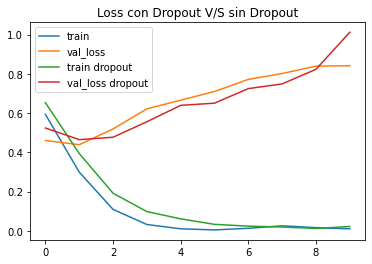

In [28]:
plt.title("Loss con Dropout V/S sin Dropout")
plt.plot(hist_2_1.history["loss"], label="train")  # , color="green"
plt.plot(hist_2_1.history["val_loss"], label="val_loss")
plt.plot(hist_2_2.history["loss"], label="train dropout")
plt.plot(hist_2_2.history["val_loss"], label="val_loss dropout")
plt.legend()
plt.show()


In [29]:
document_input = Input(shape=(max_words,), dtype="int32")
# Embedding Layer
embedding_layer = Embedding(
    input_dim=num_words,
    output_dim=embedding_size,
    input_length=max_words,
    trainable=True,
)
embedding = embedding_layer(document_input)
lstm = LSTM(10, return_sequences=False)(embedding)
dropout = Dropout(0.7)(lstm)
output = Dense(1, activation="sigmoid")(dropout)
model_2_3_1 = Model(inputs=document_input, outputs=output)
model_2_3_1.summary()
model_2_3_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
hist_2_3_1 = model_2_3_1.fit(X_tr_pad, y_train_new, epochs=10, validation_split=0.3)


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 70)]              0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 70, 30)            2319600   
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                1640      
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 2,321,251
Trainable params: 2,321,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
329/329 [==============================] - 31s 84ms/step - loss: 0.6586 - accuracy: 0.5927 - val_loss: 0

In [30]:
document_input = Input(shape=(max_words,), dtype="int32")
# Embedding Layer
embedding_layer = Embedding(
    input_dim=num_words,
    output_dim=embedding_size,
    input_length=max_words,
    trainable=True,
)
embedding = embedding_layer(document_input)
lstm = LSTM(5, return_sequences=False)(embedding)
dropout = Dropout(0.7)(lstm)
output = Dense(1, activation="sigmoid")(dropout)
model_2_3_2 = Model(inputs=document_input, outputs=output)
model_2_3_2.summary()
model_2_3_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
hist_2_3_2 = model_2_3_2.fit(X_tr_pad, y_train_new, epochs=10, validation_split=0.3)


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 70)]              0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 70, 30)            2319600   
_________________________________________________________________
lstm_2 (LSTM)                (None, 5)                 720       
_________________________________________________________________
dropout_3 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 2,320,326
Trainable params: 2,320,326
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
329/329 [==============================] - 30s 81ms/step - loss: 0.6511 - accuracy: 0.6180 - val_loss: 0

In [31]:
document_input = Input(shape=(max_words,), dtype="int32")
# Embedding Layer
embedding_layer = Embedding(
    input_dim=num_words,
    output_dim=embedding_size,
    input_length=max_words,
    trainable=True,
)
embedding = embedding_layer(document_input)
lstm = LSTM(10, return_sequences=False)(embedding)
normalization = LayerNormalization()(lstm)
dropout = Dropout(0.4)(normalization)
output = Dense(1, activation="sigmoid")(dropout)
model_2_3_3 = Model(inputs=document_input, outputs=output)
model_2_3_3.summary()
model_2_3_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
hist_2_3_3 = model_2_3_3.fit(X_tr_pad, y_train_new, epochs=10, validation_split=0.3)


Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 70)]              0         
_________________________________________________________________
embedding_6 (Embedding)      (None, 70, 30)            2319600   
_________________________________________________________________
lstm_3 (LSTM)                (None, 10)                1640      
_________________________________________________________________
layer_normalization (LayerNo (None, 10)                20        
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 2,321,271
Trainable params: 2,321,271
Non-trainable params: 0
_________________________________________________

In [32]:
document_input = Input(shape=(max_words,), dtype="int32")
# Embedding Layer
embedding_layer = Embedding(
    input_dim=num_words,
    output_dim=embedding_size,
    input_length=max_words,
    trainable=True,
)
embedding = embedding_layer(document_input)
lstm = LSTM(2, return_sequences=False)(embedding)
normalization = LayerNormalization()(lstm)
dropout = Dropout(0.4)(normalization)
output = Dense(1, activation="sigmoid")(dropout)
model_2_3_4 = Model(inputs=document_input, outputs=output)
model_2_3_4.summary()
model_2_3_4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
hist_2_3_4 = model_2_3_4.fit(X_tr_pad, y_train_new, epochs=10, validation_split=0.3)


Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 70)]              0         
_________________________________________________________________
embedding_7 (Embedding)      (None, 70, 30)            2319600   
_________________________________________________________________
lstm_4 (LSTM)                (None, 2)                 264       
_________________________________________________________________
layer_normalization_1 (Layer (None, 2)                 4         
_________________________________________________________________
dropout_5 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 3         
Total params: 2,319,871
Trainable params: 2,319,871
Non-trainable params: 0
_________________________________________________

In [33]:
document_input = Input(shape=(max_words,), dtype="int32")
# Embedding Layer
embedding_layer = Embedding(
    input_dim=num_words,
    output_dim=embedding_size,
    input_length=max_words,
    trainable=True,
)
embedding = embedding_layer(document_input)
lstm = LSTM(10, return_sequences=False)(embedding)
normalization = LayerNormalization()(lstm)
dropout = Dropout(0.7)(normalization)
output = Dense(1, activation="sigmoid")(dropout)
model_2_3_5 = Model(inputs=document_input, outputs=output)
model_2_3_5.summary()
model_2_3_5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
hist_2_3_5 = model_2_3_5.fit(X_tr_pad, y_train_new, epochs=10, validation_split=0.3)


Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 70)]              0         
_________________________________________________________________
embedding_8 (Embedding)      (None, 70, 30)            2319600   
_________________________________________________________________
lstm_5 (LSTM)                (None, 10)                1640      
_________________________________________________________________
layer_normalization_2 (Layer (None, 10)                20        
_________________________________________________________________
dropout_6 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 2,321,271
Trainable params: 2,321,271
Non-trainable params: 0
_________________________________________________

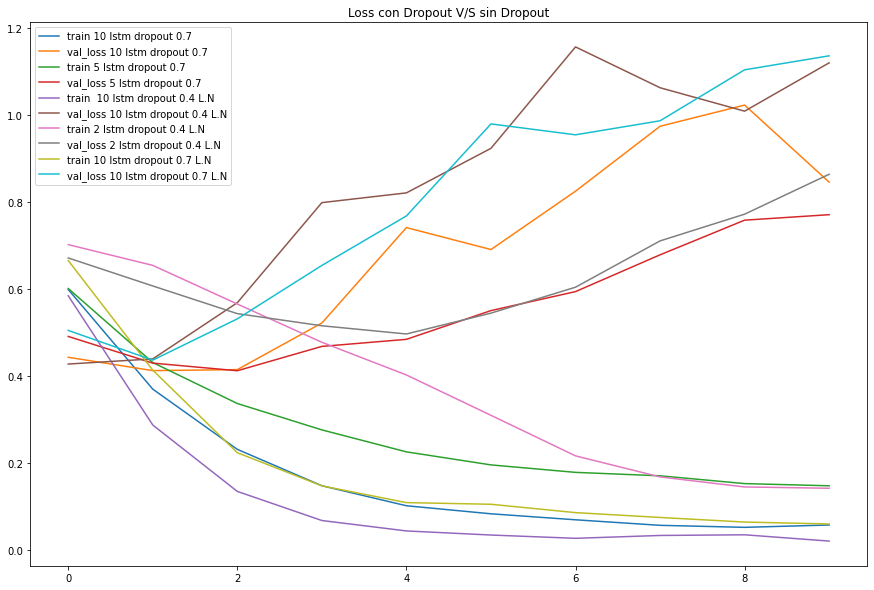

In [59]:
plt.figure(figsize=(15, 10))
plt.title("Loss con Dropout V/S sin Dropout")
plt.plot(
    hist_2_3_1.history["loss"], label="train 10 lstm dropout 0.7"
)  # , color="green"
plt.plot(hist_2_3_1.history["val_loss"], label="val_loss 10 lstm dropout 0.7")
plt.plot(hist_2_3_2.history["loss"], label="train 5 lstm dropout 0.7")
plt.plot(hist_2_3_2.history["val_loss"], label="val_loss 5 lstm dropout 0.7")
plt.plot(hist_2_3_3.history["loss"], label="train  10 lstm dropout 0.4 L.N")
plt.plot(hist_2_3_3.history["val_loss"], label="val_loss 10 lstm dropout 0.4 L.N")
plt.plot(hist_2_3_4.history["loss"], label="train 2 lstm dropout 0.4 L.N")
plt.plot(hist_2_3_4.history["val_loss"], label="val_loss 2 lstm dropout 0.4 L.N")
plt.plot(hist_2_3_5.history["loss"], label="train 10 lstm dropout 0.7 L.N")
plt.plot(hist_2_3_5.history["val_loss"], label="val_loss 10 lstm dropout 0.7 L.N")
plt.legend()
plt.show()



## Conclusions

 **Initial models:**

 It is observed that both models have overfitting problems, since the loss in the training set continues to decrease, however, in the validation set the error begins to grow considerably. To correct this problem, the number of neurons in the network should be reduced or regularization methods added such as: Dropout or LayerNormalization (BatchNormalization does not apply to RNNs). On the other hand, it is observed that the dropout-trained network has fewer **overfitting** problems than the non-dropout network, so increasing the dropout probability could help improve the generalizability of the network.

 **Other combinations:**

 As can be seen, networks with a greater number of LSTM cells tend to have a greater error in the validation set, that is, they overfit more. It is worth noting that applying layer normalization reduces errors in the validation set. curves val_loss 10 lstm dropout 0.7 and val_loss 10 lstm dropout 0.7 LN On the other hand, it is observed that increasing dropout from 0.4 to 0.7 does not generate large differences in the results, except in the lstm with 2 and 5 cells. Finally, the greatest reduction in overfitting is obtained by reducing the complexity of the model, which is why the error curves of the validation set represent lower values for the models with 2 and 5 lstm cells. From the foregoing, it is concluded that modifying the architecture (hyperparameter) of the model allows making large adjustments to avoid overfitting or underfitting, however, for more precise adjustments, it is possible to play with the Dropout and Layer normalization type hyperparameters.



# Unsupervised Learning

 In this section we will implement dimensionality reduction methods and evaluate their application on the sentiment classification problem.


In [35]:
# Obtención de embeddings
embeddings = embedding_layer.get_weights()[
    0
]  # capa utilizada para hacer los embeddings
words_embeddings = {w: embeddings[idx] for w, idx in tokenizer.word_index.items()}


In [36]:
len(list(words_embeddings.items()))


77319

In [37]:
sample_keys_embeddings = np.random.choice(
    list(words_embeddings.keys()), size=5000, replace=False
)
sample_words_embeddings = {}
for key in sample_keys_embeddings:
    sample_words_embeddings[key] = words_embeddings[key]



PCA application to embeddings:


In [38]:
embeddings_pca = PCA(n_components=10)
embedding_pca_values = embeddings_pca.fit_transform(
    list(sample_words_embeddings.values())
)
for i, key in enumerate(sample_keys_embeddings):
    sample_words_embeddings[key] = embedding_pca_values[i]



Application of TSNE to embeddings:


In [39]:
embeddings_tsne = TSNE(n_components=2)
embeddings_tsne_values = embeddings_tsne.fit_transform(
    list(sample_words_embeddings.values())
)



### T-SNE method explanation

 The t-sne method can be divided into two important steps, the first is the construction of a **probability distribution** from the **similarity** between pairs of points in the original space of the dataset and the second is to construct a probability distribution in the space of **lower dimensionality** based on the distribution constructed in step 1.

 To build the distribution in the **high-dimensional** space, the similarity between each pair of points is calculated, this similarity is calculated with the **distance to the neighbors** and also, building a **Gaussian distribution** centered on each point where the probability density is calculated given the frequency of the neighbors within the radius of the Gaussian, that is, **density and distance** to the central point are considered.

 In step 2, we seek to construct a probability distribution in the low-dimensional space by minimizing the **Kullback-Leibler divergence** between the distribution in the high- and low-dimensional space. The Kullback-Leibler divergence measures the similarity or difference between two probability distribution functions. Each data point in the high-dimensional space is randomly mapped to the low-dimensional space based on the probability distribution computed by **minimizing** the Kullback-Leibler divergence. The utility of the method is that you can visualize the relationships of an **x-dimensional** dataset with x&gt;=4 in a **human-readable 2d or 3d space.**



Next we will graph the result of applying T-SNE to the embeddings:


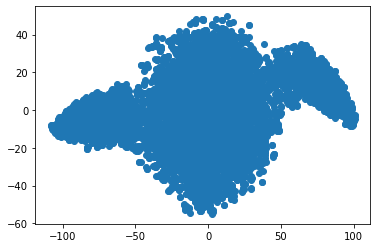

In [40]:
plt.scatter(embeddings_tsne_values[:, 0], embeddings_tsne_values[:, 1])



Embedding clustering with KMeans methods:


In [60]:
kmeans = KMeans(n_clusters=3).fit(embeddings_tsne_values)
gm = GaussianMixture(n_components=3, random_state=0).fit(embeddings_tsne_values)



Cluster analysis:


Algunas palabras en el cluster 0
[['till']
 ['fore']
 ['reed']
 ['reflection']
 ["script'"]
 ['attentively']
 ['terrific']
 ['colorful']
 ['passages']
 ['buckaroo']]
Algunas palabras en el cluster 1
[['scam']
 ['demonstrations']
 ['karate']
 ['valuables']
 ['dishonor']
 ['sybil']
 ['nonlds']
 ['spike']
 ['derailed']
 ['napoleonic']]
Algunas palabras en el cluster 2
[['emulating']
 ['retrieval']
 ['imus']
 ['vor']
 ['raffin']
 ['shallowest']
 ['shockless']
 ["back'"]
 ["kathy's"]
 ["'hall"]]


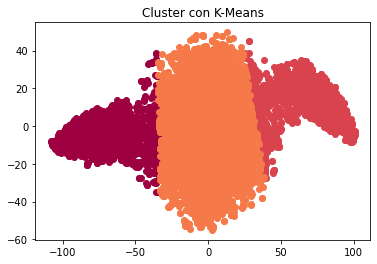

In [61]:
for i in range(3):
    cluster = np.take(embeddings_tsne_values, np.argwhere(kmeans.labels_ == i), axis=0)[
        :, 0
    ]
    plt.scatter(cluster[:, 0], cluster[:, 1], color=plt.cm.Spectral((i / k)))
    palabras = np.take(sample_keys_embeddings, np.argwhere(kmeans.labels_ == i))[0:10]
    print(f"Algunas palabras en el cluster {i}")
    print(palabras)
plt.title("Cluster con K-Means")
plt.show()


Algunas palabras en el cluster 0
[['till']
 ['fore']
 ['reed']
 ['reflection']
 ["script'"]
 ['attentively']
 ['terrific']
 ['colorful']
 ['passages']
 ['buckaroo']]
Algunas palabras en el cluster 1
[['scam']
 ['demonstrations']
 ['karate']
 ['valuables']
 ['dishonor']
 ['sybil']
 ['nonlds']
 ['spike']
 ['derailed']
 ['napoleonic']]
Algunas palabras en el cluster 2
[['emulating']
 ['retrieval']
 ['imus']
 ['vor']
 ['raffin']
 ['shallowest']
 ['shockless']
 ["back'"]
 ["kathy's"]
 ["'hall"]]


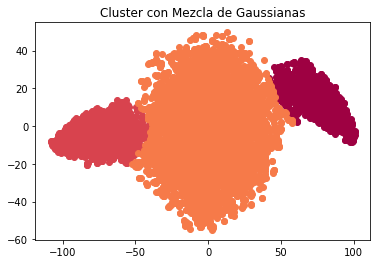

In [63]:
predict = gm.predict(embeddings_tsne_values)
for i in range(3):
    cluster = np.take(embeddings_tsne_values, np.argwhere(predict == i), axis=0)[:, 0]
    plt.scatter(cluster[:, 0], cluster[:, 1], color=plt.cm.Spectral((i / k)))
    palabras = np.take(sample_keys_embeddings, np.argwhere(kmeans.labels_ == i))[0:10]
    print(f"Algunas palabras en el cluster {i}")
    print(palabras)
plt.title("Cluster con Mezcla de Gaussianas")
plt.show()



### Conclusions

 Three possible clusters are observed, a central one with an oval shape and two lateral ones similar to wings. It is concluded that given the difference in size in the clusters, the k-means algorithm fails to correctly separate the clusters, on the other hand, the Gaussian mixture algorithm obtains a very good result in the identification and separation of clusters. As expected, the words belonging to the same cluster do not seem to have a relationship at first glance, given that we have 5000 words, it is complex to group them into only 3 categories, each cluster could represent some latent variable of the vocabulary that is not necessarily interpretable by a user. human being.



# LSTM network with GLOVE embedding (Extra)

 We will download the pre-trained embeddings from [https://nlp.stanford.edu/projects/glove/](https://nlp.stanford.edu/projects/glove/)


In [44]:
# Funciones para cargar los vectores GLOVE
def glorot_uniform_np(shape):
    fan_in, fan_out = shape[0], shape[1]
    s = np.sqrt(6.0 / (fan_in + fan_out))
    return np.random.uniform(-s, s, size=shape)


def load_word_vectors(embeddings_index, glove_file):
    print("Indexing word vectors.")
    for line in glove_file:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype="float32")
        embeddings_index[word] = coefs
    glove_file.close()
    print("Found %s word vectors." % len(embeddings_index))


In [45]:
# Cargando los vectores GLOVE
## LOAD PRETRAINED WORD VECTORS
GLOVE_FILE = "glove.6B.100d.txt"
embeddings_index = {}
glove_file = open(GLOVE_FILE, encoding="utf8")

load_word_vectors(embeddings_index, glove_file)
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
embeddings_index = {}


Indexing word vectors.
Found 400000 word vectors.


In [46]:
embedding_matrix.shape


(77320, 100)


Use of pre-trained embeddings:


In [47]:
from keras.initializers import Constant

document_input = Input(shape=(max_words,), dtype="int32")

embedding_layer = Embedding(
    input_dim=num_words,
    output_dim=100,
    input_length=max_words,
    embeddings_initializer=Constant(embedding_matrix),
)
embedding = embedding_layer(document_input)
lstm = LSTM(10, return_sequences=False)(embedding)
dropout = Dropout(0.4)(lstm)
output = Dense(1, activation="sigmoid")(dropout)
model_2_5_1 = Model(inputs=document_input, outputs=output)
model_2_5_1.summary()
model_2_5_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
hist_2_5_1 = model_2_5_1.fit(X_tr_pad, y_train_new, epochs=10, validation_split=0.3)


Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 70)]              0         
_________________________________________________________________
embedding_9 (Embedding)      (None, 70, 100)           7732000   
_________________________________________________________________
lstm_6 (LSTM)                (None, 10)                4440      
_________________________________________________________________
dropout_7 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 7,736,451
Trainable params: 7,736,451
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
329/329 [==============================] - 51s 147ms/step - loss: 0.6620 - accuracy: 0.5894 - val_loss: 

'  -----------  '

In [50]:
loss, acc = model_2_5_1.evaluate(X_te_pad, y_test_new)
print("Accuracy en datos de test: {0}".format(acc))


94/94 [==============================] - 0s 5ms/step - loss: 1.1675 - accuracy: 0.7690
Accuracy en datos de test: 0.7689999938011169


In [51]:
document_input = Input(shape=(max_words,), dtype="int32")
embedding_layer = Embedding(
    input_dim=num_words,
    output_dim=100,
    input_length=max_words,
    embeddings_initializer=Constant(embedding_matrix),
)
embedding = embedding_layer(document_input)
simple_rnn = SimpleRNN(10, return_sequences=False)(embedding)
dropout = Dropout(0.4)(simple_rnn)
output = Dense(1, activation="sigmoid")(dropout)
model_2_5_2 = Model(inputs=document_input, outputs=output)
model_2_5_2.summary()
model_2_5_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
hist_2_5_2 = model_2_5_2.fit(X_tr_pad, y_train_new, epochs=10, validation_split=0.3)


Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 70)]              0         
_________________________________________________________________
embedding_10 (Embedding)     (None, 70, 100)           7732000   
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 10)                1110      
_________________________________________________________________
dropout_8 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 7,733,121
Trainable params: 7,733,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
329/329 [==============================] - 50s 148ms/step - loss: 0.7264 - accuracy: 0.5149 - val_loss: 

In [52]:
loss, acc = model_2_5_2.evaluate(X_te_pad, y_test_new)
print("Accuracy en datos de test: {0}".format(acc))


94/94 [==============================] - 0s 3ms/step - loss: 0.7569 - accuracy: 0.7387
Accuracy en datos de test: 0.7386666536331177


In [53]:
document_input = Input(shape=(max_words,), dtype="int32")
embedding_layer = Embedding(
    input_dim=num_words,
    output_dim=100,
    input_length=max_words,
    embeddings_initializer=Constant(embedding_matrix),
)
embedding = embedding_layer(document_input)
simple_rnn = SimpleRNN(10, return_sequences=False)(embedding)
output = Dense(1, activation="sigmoid")(simple_rnn)
model_2_5_3 = Model(inputs=document_input, outputs=output)
model_2_5_3.summary()
model_2_5_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
hist_2_5_3 = model_2_5_3.fit(X_tr_pad, y_train_new, epochs=10, validation_split=0.3)


Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 70)]              0         
_________________________________________________________________
embedding_11 (Embedding)     (None, 70, 100)           7732000   
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 10)                1110      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 7,733,121
Trainable params: 7,733,121
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
329/329 [==============================] - 54s 162ms/step - loss: 0.6945 - accuracy: 0.5512 - val_loss: 0.6434 - val_accuracy: 0.6293
Epoch 2/10
329/329 [==============================] - 53s 161ms/step - loss: 0.5787 - accuracy: 0.704

In [54]:
loss, acc = model_2_5_3.evaluate(X_te_pad, y_test_new)
print("Accuracy en datos de test: {0}".format(acc))


94/94 [==============================] - 0s 4ms/step - loss: 0.7940 - accuracy: 0.7317
Accuracy en datos de test: 0.7316666841506958


In [55]:
document_input = Input(shape=(max_words,), dtype="int32")
embedding_layer = Embedding(
    input_dim=num_words,
    output_dim=100,
    input_length=max_words,
    embeddings_initializer=Constant(embedding_matrix),
)
embedding = embedding_layer(document_input)
flatten = Flatten()(embedding)
dense = Dense(8)(flatten)
output = Dense(1, activation="sigmoid")(dense)
model_2_5_4 = Model(inputs=document_input, outputs=output)
model_2_5_4.summary()
model_2_5_4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
hist_2_5_4 = model_2_5_4.fit(X_tr_pad, y_train_new, epochs=10, validation_split=0.3)


Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 70)]              0         
_________________________________________________________________
embedding_12 (Embedding)     (None, 70, 100)           7732000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 7000)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 56008     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 9         
Total params: 7,788,017
Trainable params: 7,788,017
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
329/329 [==============================] - 52s 157ms/step - loss: 0.7731 - accuracy: 0.5943 - val_loss:

In [56]:
loss, acc = model_2_5_4.evaluate(X_te_pad, y_test_new)
print("Accuracy en datos de test: {0}".format(acc))


94/94 [==============================] - 0s 1ms/step - loss: 0.9271 - accuracy: 0.7670
Accuracy en datos de test: 0.7670000195503235
